In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math

# Import library to hide warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
np.random.seed(42)

In [4]:
# Read the dataset
df = pd.read_csv('Steam Data.csv', names = ["UserID", "Game", "Behavior", "Value", "Unknown"])
df.head()

,UserID,Game,Behavior,Value,Unknown
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0,0
1,151603712,The Elder Scrolls V Skyrim,play,273.0,0
2,151603712,Fallout 4,purchase,1.0,0
3,151603712,Fallout 4,play,87.0,0
4,151603712,Spore,purchase,1.0,0


In [5]:
df.isnull().sum()

UserID      0
Game        0
Behavior    0
Value       0
Unknown     0
dtype: int64

In [6]:
del df["Unknown"]

In [7]:
df_purchase = df[df["Behavior"] == "purchase"]
df_play = df[df["Behavior"] == "play"]

In [8]:
df_purchase.head()

,UserID,Game,Behavior,Value
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0
2,151603712,Fallout 4,purchase,1.0
4,151603712,Spore,purchase,1.0
6,151603712,Fallout New Vegas,purchase,1.0
8,151603712,Left 4 Dead 2,purchase,1.0


In [9]:
df_play.head()

,UserID,Game,Behavior,Value
1,151603712,The Elder Scrolls V Skyrim,play,273.0
3,151603712,Fallout 4,play,87.0
5,151603712,Spore,play,14.9
7,151603712,Fallout New Vegas,play,12.1
9,151603712,Left 4 Dead 2,play,8.9


In [10]:
del df_purchase["Behavior"]
del df_play["Behavior"]

In [11]:
print(f"Unique users that have purchased: {df_purchase.UserID.unique().shape[0]}")
print(f"Unique games that have been purchased: {df_purchase.Game.unique().shape[0]}")
print(f"Unique users that have played: {df_play.UserID.unique().shape[0]}")
print(f"Unique games that have been played: {df_play.Game.unique().shape[0]}")

Unique users that have purchased: 12393
Unique games that have been purchased: 5155
Unique users that have played: 11350
Unique games that have been played: 3600


In [12]:
df_purchase['GameName'] = df_purchase['Game'] 

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
labelencoder = LabelEncoder()
df_purchase['Game'] = labelencoder.fit_transform(df_purchase['Game'])

In [15]:
game_decode_map = df_purchase[["Game", "GameName"]]

In [16]:
game_decode_map.drop_duplicates(subset ="GameName", keep = 'first', inplace = True) 

In [17]:
game_decode_map

,Game,GameName
0,4364,The Elder Scrolls V Skyrim
2,1678,Fallout 4
4,3997,Spore
6,1679,Fallout New Vegas
8,2475,Left 4 Dead 2
...,...,...
198738,4935,Warriors & Castles
199022,3587,Romance of the Three Kingdoms Maker
199583,3939,Space Colony
199661,2511,Life is Hard


In [18]:
del df_purchase['GameName']

In [19]:
user_games_df = df_purchase.groupby(['UserID']).agg({'Game': 'count'}).rename(columns={'Game':'TotalGames'})
user_games_df.head()

,TotalGames
UserID,
5250,21
76767,36
86540,82
103360,10
144736,8


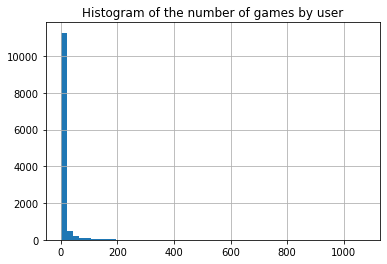

In [20]:
user_games_df['TotalGames'].hist(bins=50)
plt.title('Histogram of the number of games by user')
plt.show()

In [21]:
user_games_df[user_games_df["TotalGames"] > 200].count()

TotalGames    72
dtype: int64

In [22]:
print(user_games_df["TotalGames"].mean())

10.45033486645687


In [23]:
user_group_df = df_purchase.groupby(['UserID', 'Game']).agg({'Game': 'count'}).rename(columns={'Game':'Value'})
user_group_df.head()

Value
UserID Game       
5250   227       1
       852       1
       978       1
       984       1
       1131      1

In [24]:
user_group_df['Value'] = 1

In [25]:
user_group_df = user_group_df.reset_index()

In [26]:
group_user_game_count = user_group_df.groupby('UserID').count()
not1game = group_user_game_count[(group_user_game_count['Game'] >= 2)].index
user_group_df = user_group_df[user_group_df['UserID'].isin(not1game)]

In [27]:
print(f"Number of users that have purchased more than 1 game: {user_group_df.UserID.unique().shape[0]}")

Number of users that have purchased more than 1 game: 6693


In [28]:
from sklearn.model_selection import train_test_split

In [29]:
train_df, test_df = train_test_split(user_group_df, test_size=0.25, stratify=user_group_df['UserID'])

In [33]:
train_df.head()

,UserID,Game,Value
54460,71390526,4362,1
103500,168163793,4822,1
84707,122798021,2166,1
113820,200673341,476,1
20873,30699429,4647,1


In [31]:
test_df.head()

,UserID,Game,Value
45965,60744461,2073,1
40299,54826284,4366,1
34284,47457723,4938,1
67470,88579585,3450,1
42066,57603447,3865,1


In [34]:
train_user_group_df = train_df.pivot(index='UserID', columns='Game', values='Value').fillna(0)

In [35]:
train_user_group_df

Game,0,1,2,3,4,5,6,7,8,9,...,5142,5145,5146,5147,5148,5149,5150,5152,5153,5154
UserID,,,,,,,,,,,,,,,,,,,,,
5250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76767,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86540,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103360,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
144736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309188905,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
309262440,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
309265377,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
from sklearn.metrics.pairwise import pairwise_distances

In [37]:
def get_user_predictions_i(user, predictions, n_preds):
    user_predictions = predictions.loc[user].sort_values(ascending=False).reset_index()
    user_products = train_df[train_df['UserID']==user]['Game']
    user_predictions = user_predictions[~user_predictions['Game'].isin(user_products)]
    user_predictions = user_predictions.reset_index()
    del user_predictions['index']
    
    name_list = []
    for game in list(user_predictions['Game']):
        name_list += (list(game_decode_map[game_decode_map['Game'] == game]['GameName']))
    user_predictions['GameName'] = name_list
    return user_predictions[:n_preds]

def train_test_results_i(user, data):
    actuals = data[data['UserID'] == user]
    name_list = []
    for game in list(actuals['Game']):
        name_list += (list(game_decode_map[game_decode_map['Game'] == game]['GameName']))
    actuals['GameName'] = name_list
    return actuals

In [47]:
def get_user_predictions_t(user, predictions, n_preds):
    user_predictions = predictions.loc[user].sort_values(ascending=False).reset_index()
    user_products = train_df[train_df['UserID']==user]['Game']
    user_predictions = user_predictions[~user_predictions['Game'].isin(user_products)]
    return user_predictions[:n_preds]

def train_test_results_t(user, data):
    actuals = data[data['UserID'] == user]
    return actuals

def validation(data, recommendations):
    precision_list = []
    recall_list = []
    f1_list = []
    for user in list(data.index):
        train_results = train_test_results_t(user, train_df)
        test_results = train_test_results_t(user, test_df)
        predictions = get_user_predictions_t(user, data, recommendations)
        merge = predictions.merge(test_results, left_on='Game', right_on='Game', suffixes=('_left', '_right'))
        
        true_positive = len(merge)
        false_positive = len(predictions) - len(merge)
        false_negative = len(test_results) - len(merge)
        
        if len(test_results) > 0:        
            precision = true_positive / (true_positive + false_positive)
            recall = true_positive / (true_positive + false_negative)
        else:
            precision = true_positive / (true_positive + false_positive)
            recall = 0
        
        if precision + recall != 0:
            F1 = (2 * recall * precision) / (recall + precision)
        else:
            F1 = 0
        
        precision_list.append(precision)
        recall_list.append(recall)
        f1_list.append(F1)
    
    avg_precision = sum(precision_list) / len(precision_list)
    avg_recall = sum(recall_list) / len(recall_list)
    avg_F1 = sum(f1_list) / len(f1_list)
    
    print(f"Average Precision: {avg_precision}")
    print(f"Average Recall: {avg_recall}")
    print(f"Average F1: {avg_F1}")

In [39]:
def cosine_distance_model():
    item_similarity = pairwise_distances(train_user_group_df.values.T, metric='cosine')
    user_predictions = train_user_group_df.values.dot(item_similarity)/np.abs(item_similarity.sum(axis=1))
    user_predictions = 1 / (1 + user_predictions)
    cosine_distance_df = pd.DataFrame(user_predictions, columns=train_user_group_df.columns, index=train_user_group_df.index)
    return cosine_distance_df

In [40]:
cosine_distance_df = cosine_distance_model()
cosine_distance_df.head()

Game,0,1,2,3,4,5,6,7,8,9,...,5142,5145,5146,5147,5148,5149,5150,5152,5153,5154
UserID,,,,,,,,,,,,,,,,,,,,,
5250,0.996670,0.996751,0.996722,0.996762,0.996644,0.996703,0.996652,0.996624,0.996658,0.996626,...,0.996672,0.996674,0.996700,0.996689,0.996738,0.996674,0.996738,0.996703,0.996764,0.996674
76767,0.994431,0.994431,0.994378,0.994489,0.994281,0.994425,0.994336,0.994341,0.994411,0.994380,...,0.994452,0.994416,0.994322,0.994398,0.994547,0.994424,0.994473,0.994386,0.994541,0.994437
86540,0.987264,0.987394,0.987433,0.987838,0.987103,0.987293,0.987914,0.987398,0.987371,0.987413,...,0.987314,0.987234,0.987462,0.987228,0.987859,0.987234,0.987461,0.987387,0.987482,0.987282
103360,0.998540,0.998574,0.998543,0.998553,0.998531,0.998549,0.998523,0.998511,0.998535,0.998524,...,0.998539,0.998542,0.998522,0.998541,0.998548,0.998542,0.998557,0.998547,0.998570,0.998536
144736,0.998749,0.998777,0.998746,0.998753,0.998762,0.998754,0.998734,0.998723,0.998739,0.998735,...,0.998747,0.998750,0.998743,0.998750,0.998757,0.998750,0.998756,0.998744,0.998771,0.998745


In [41]:
train_results = train_test_results_i(144736, train_df)
predictions = get_user_predictions_i(144736, cosine_distance_df, 10)
test_results = train_test_results_i(144736, test_df)
print(f"TRAINING INTERACRIONS")
print(f"{train_results}")
print("")
print(f"RECOMMENDATIONS")
print(f"{predictions}")
print("")
print(f"ACTUAL INTERACTIONS")
print(f"{test_results}")

TRAINING INTERACRIONS
     UserID  Game  Value                  GameName
154  144736  2078      1  Half-Life Opposing Force
150  144736  1131      1             Day of Defeat
153  144736  2076      1      Half-Life Blue Shift
156  144736  4258      1     Team Fortress Classic
151  144736  1179      1        Deathmatch Classic
149  144736   978      1            Counter-Strike

RECOMMENDATIONS
   Game    144736                                      GameName
0  3531  0.999456                                      Ricochet
1  2069  0.999438                                     Half-Life
2   979  0.999171                 Counter-Strike Condition Zero
3   980  0.999155  Counter-Strike Condition Zero Deleted Scenes
4  2079  0.999058                              Half-Life Source
5  2077  0.999043                   Half-Life Deathmatch Source
6  2074  0.999039                        Half-Life 2 Lost Coast
7  2070  0.999037                                   Half-Life 2
8  2071  0.999037           

In [48]:
validation(cosine_distance_df, 10)

Average Precision: 0.11385029134917658
Average Recall: 0.3929783481504778
Average F1: 0.1388508128058894


In [49]:
def euclidean_distance_model():
    item_similarity = pairwise_distances(train_user_group_df.values.T, metric='euclidean')
    user_predictions = train_user_group_df.values.dot(item_similarity)/np.abs(item_similarity.sum(axis=1))
    user_predictions = 1 / (1 + user_predictions)
    euclidean_distance_df = pd.DataFrame(user_predictions, columns=train_user_group_df.columns, index=train_user_group_df.index)
    return euclidean_distance_df

In [50]:
euclidean_distance_df = euclidean_distance_model()
euclidean_distance_df.head()

Game,0,1,2,3,4,5,6,7,8,9,...,5142,5145,5146,5147,5148,5149,5150,5152,5153,5154
UserID,,,,,,,,,,,,,,,,,,,,,
5250,0.979590,0.980710,0.981479,0.982291,0.979334,0.983541,0.980459,0.983840,0.984765,0.982799,...,0.979584,0.979598,0.982198,0.979598,0.986628,0.979597,0.991808,0.984850,0.994210,0.979573
76767,0.977930,0.979062,0.979853,0.980712,0.977644,0.981979,0.978826,0.982307,0.983258,0.981260,...,0.977930,0.977932,0.980580,0.977923,0.985164,0.977934,0.990144,0.983290,0.992383,0.977913
86540,0.964370,0.966108,0.967348,0.968734,0.963984,0.970373,0.966025,0.971004,0.972308,0.969433,...,0.964377,0.964371,0.968499,0.964364,0.975223,0.964371,0.981923,0.972365,0.984798,0.964350
103360,0.991566,0.992034,0.992347,0.992681,0.991461,0.993211,0.991927,0.993334,0.993724,0.992907,...,0.991563,0.991569,0.992641,0.991568,0.994482,0.991569,0.996619,0.993754,0.997595,0.991557
144736,0.992940,0.993332,0.993592,0.993871,0.992858,0.994315,0.993243,0.994420,0.994743,0.994063,...,0.992938,0.992943,0.993845,0.992942,0.995382,0.992943,0.997156,0.994765,0.997969,0.992933


In [51]:
train_results = train_test_results_i(144736, train_df)
predictions = get_user_predictions_i(144736, euclidean_distance_df, 10)
test_results = train_test_results_i(144736, test_df)
print(f"TRAINING INTERACRIONS")
print(f"{train_results}")
print("")
print(f"RECOMMENDATIONS")
print(f"{predictions}")
print("")
print(f"ACTUAL INTERACTIONS")
print(f"{test_results}")

TRAINING INTERACRIONS
     UserID  Game  Value                  GameName
154  144736  2078      1  Half-Life Opposing Force
150  144736  1131      1             Day of Defeat
153  144736  2076      1      Half-Life Blue Shift
156  144736  4258      1     Team Fortress Classic
151  144736  1179      1        Deathmatch Classic
149  144736   978      1            Counter-Strike

RECOMMENDATIONS
   Game    144736                                      GameName
0  3531  0.998889                                      Ricochet
1  2069  0.998765                                     Half-Life
2   979  0.998706                 Counter-Strike Condition Zero
3   980  0.998689  Counter-Strike Condition Zero Deleted Scenes
4  2074  0.998673                        Half-Life 2 Lost Coast
5  4257  0.998664                               Team Fortress 2
6   984  0.998660                         Counter-Strike Source
7  1336  0.998658                                        Dota 2
8   981  0.998649           

In [52]:
validation(euclidean_distance_df, 10)

Average Precision: 0.07903780068728933
Average Recall: 0.33215422867321265
Average F1: 0.10379101807729056
